# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df.loc[mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = mouse_df.loc[mouse_df["Mouse ID"]=="g989",:]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df[mouse_df["Mouse ID"].isin(duplicates)==False]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mouse_df["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
variance = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mouse Timepoints per Drug Regimen')

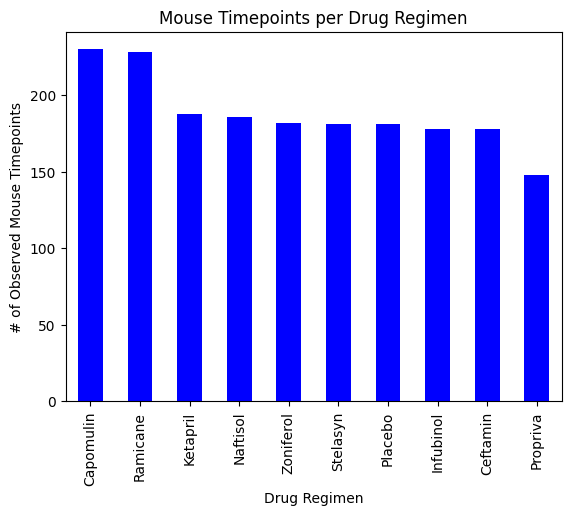

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg = clean_mouse_df["Drug Regimen"].value_counts()
drug_reg_bar_pandas = drug_reg.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints per Drug Regimen")

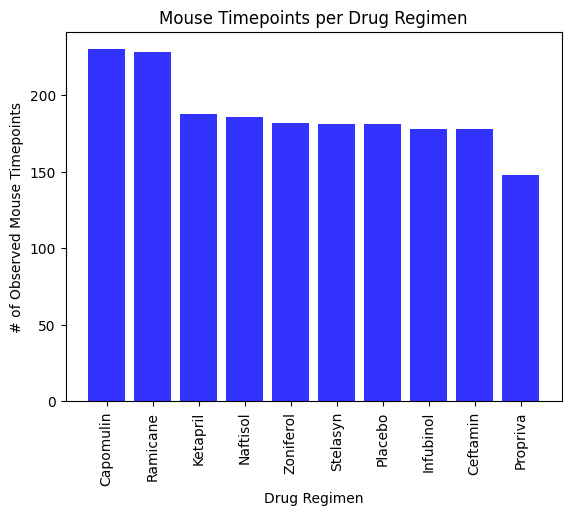

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_reg.index.values, drug_reg.values, color='b', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints per Drug Regimen")
plt.xticks(rotation=90)

plt.show()

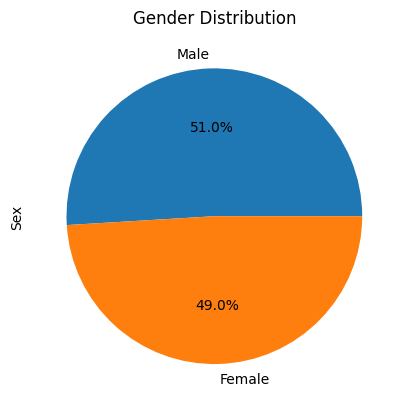

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_mouse_df["Sex"].value_counts()
gender_pie.plot.pie(autopct= "%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.show()

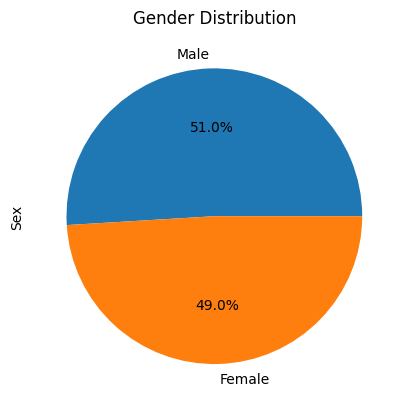

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot = gender_pie.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
Cap = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
#Ram = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
Inf = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
Ceft = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]

cap_last = Cap.groupby('Mouse ID').max()['Timepoint']
#ram_last = Ram.groupby('Mouse ID').max()['Timepoint']
#inf_last = Inf.groupby('Mouse ID').max()['Timepoint']
#ceft_last = Ceft.groupby('Mouse ID').max()['Timepoint']

cap_vol = pd.DataFrame(cap_last)
#ram_vol = pd.DataFrame(ram_last)
#inf_vol = pd.DataFrame(inf_last)
#ceft_vol = pd.DataFrame(ceft_last)

cap_merge = pd.merge(cap_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#ram_merge = pd.merge(ram_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#inf_merge = pd.merge(inf_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#ceft_merge = pd.merge(ceft_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")


In [23]:
reduced_mouse_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin") | (clean_mouse_df["Drug Regimen"] == "Ramicane") |
                                        (clean_mouse_df["Drug Regimen"] == "Infubinol") |(clean_mouse_df["Drug Regimen"] == "Ceftamin") ]

last_tp1 = reduced_mouse_df.groupby(["Drug Regimen","Mouse ID"]).last()
last_tp2 = last_tp1.reset_index()
last_tp3 =last_tp2[["Drug Regimen", "Tumor Volume (mm3)"]]

cap_df = last_tp3.loc[last_tp3["Drug Regimen"] == "Capomulin"]

ram_df = last_tp3.loc[last_tp3["Drug Regimen"] == "Ramicane"]

inf_df = last_tp3.loc[last_tp3["Drug Regimen"] == "Infubinol"]

ceft_df = last_tp3.loc[last_tp3["Drug Regimen"] == "Ceftamin"]

drug_df = pd.DataFrame({"Capomulin": cap_df["Tumor Volume (mm3)"],
         "Ramicane": ram_df["Tumor Volume (mm3)"],
          "Infubinol": inf_df["Tumor Volume (mm3)"],
          "Ceftamin": ceft_df["Tumor Volume (mm3)"]})

In [56]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

vol_data = []
vol_data.extend(reduced_mouse_df["Tumor Volume (mm3)"].tolist())
vol_series = pd.Series(vol_data)

for drug in treatment_list:    
    quartiles = drug_df[drug].quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper-lower
    lower_bound = round(lower - (1.5*iqr),2)
    upper_bound = round(upper + (1.5*iqr),2)
    
    print(f"{drug}'s IQR is {iqr}.")

    outliers = vol_series.loc[(vol_data<lower_bound)|(vol_series>upper_bound)]
    print(f"Outliers for {drug}: {outliers.tolist()}")
    #I know these are wrong I just tried and failed

20.7
Capomulin's IQR is 7.781863460000004.
Outliers for Capomulin: [51.8524372, 52.76102114, 54.21606411, 52.7778705, 52.94946474, 52.60910758, 51.8332246, 53.24445813, 54.04621267, 52.19836818, 51.90902494, 52.36518457, 55.08772445, 54.48451945, 54.46259376, 54.77896052, 54.57107607, 52.0050659, 51.99761855, 54.82252091, 51.91490968, 53.24431157, 55.02572434, 52.22832698, 52.61749003, 54.44303502, 54.00534209, 51.90544699, 56.74200681, 54.04860769, 53.6768396, 52.90529861, 52.36198241, 55.24927296, 53.32350743, 53.42766344, 55.17333648, 52.92534846, 52.84755893, 57.17353846, 54.61397279, 54.51057493, 51.93528318, 55.81003359, 52.43006649, 53.57606417, 54.95166826, 52.06848642, 55.08363235, 56.05774909, 54.04133326, 52.31817407, 58.33595901, 55.65068132, 55.67480798, 51.8690587, 53.0788944, 61.46196976, 57.53419288, 57.43200731, 54.38093154, 51.93995092, 56.17638452, 56.17445785, 55.76714817, 52.7804893, 55.65083791, 57.408638, 56.68786392, 57.4146457, 53.18065678, 54.31640682, 56.7932

Text(0.5, 0, '')

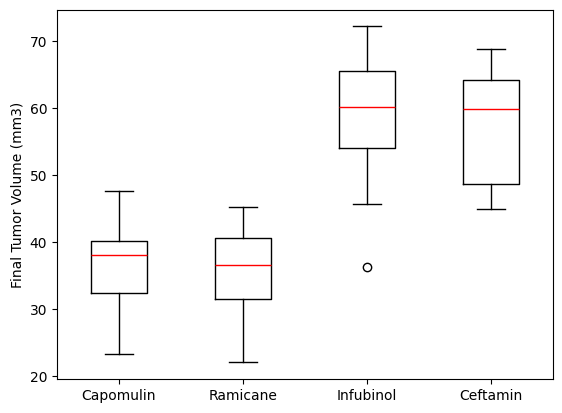

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = drug_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='r'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

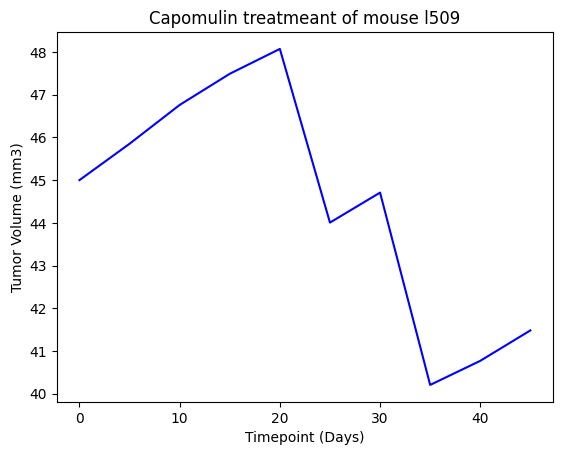

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_line = Cap.loc[Cap["Mouse ID"] == "l509",:]
x_axis = cap_line["Timepoint"]
y_axis = cap_line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

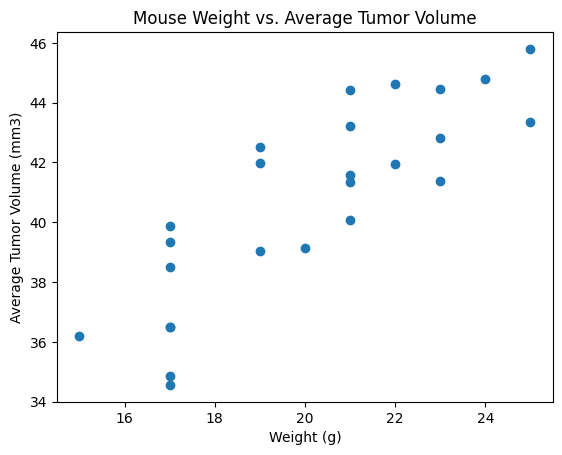

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = Cap.groupby("Mouse ID")

#find and store avg tumor vol for each weight
cap_vol = cap_df[("Tumor Volume (mm3)")].mean()
cap_weight = cap_df["Weight (g)"].mean()

#graph build and display
plt.scatter(cap_weight, cap_vol)
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


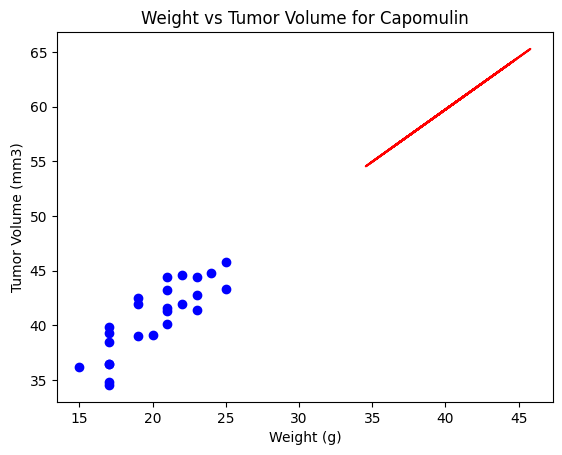

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(cap_weight,cap_vol)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_weight,cap_vol)
regress_values=(cap_vol*slope) + intercept

plt.scatter(cap_weight,cap_vol,color='b')
plt.plot(cap_vol, regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()